# Découverte de pandas

In [1]:
import pandas as pd

Un objet : le dataframe

In [6]:
df = pd.DataFrame([
                   [5,3,1],
                   ["se","la","les"],
                    ["a","b","c"]
                  ])

In [7]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.columns = ["colonne1","colonne2","colonne3"]

In [19]:
df

,colonne1,colonne2,colonne3
0,5,3,1
1,se,la,les
2,a,b,c


In [15]:
df["colonne1"]

0     5
1    se
2     a
Name: colonne1, dtype: object

In [17]:
df.loc[1]

colonne1     se
colonne2     la
colonne3    les
Name: 1, dtype: object

In [18]:
df.loc[1,"colonne2"]

'la'

In [20]:
df["ma nouvelle colonne"] = [45,34,55]

In [21]:
df

,colonne1,colonne2,colonne3,ma nouvelle colonne
0,5,3,1,45
1,se,la,les,34
2,a,b,c,55


## Enquête SOSP

https://zenodo.org/record/5827206

In [25]:
url = "https://zenodo.org/record/5827206/files/SOSP_Export_base%20de%20donn%C3%A9es%20diffusable.csv?download=1"
df = pd.read_csv(url)

In [26]:
df.to_excel("fichier.xlsx")

In [28]:
df = pd.read_csv("../../../../Téléchargements/SOSP_Export_base de données diffusable.csv")

Tester les valeurs nulles

In [32]:
df["annee_premiere_publi"].isna().sum()

0

In [34]:
df["annee_premiere_publi"].mean()

2004.030303030303

In [35]:
df["annee_premiere_publi"].median()

2005.0

In [36]:
df["annee_premiere_publi"].describe()

count    1089.000000
mean     2004.030303
std        11.362671
min      1968.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2020.000000
Name: annee_premiere_publi, dtype: float64

<AxesSubplot:title={'center':'Distribution années de publication'}, ylabel='Frequency'>

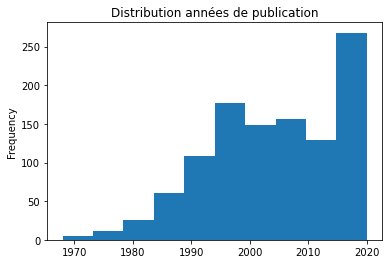

In [43]:
df["annee_premiere_publi"].plot(kind="hist",
                                title="Distribution années de publication")

Gérer les valeurs nulles

In [47]:
df["disciplines_9niv"] = df["disciplines_9niv"].fillna("Valeur manquante")

In [48]:
df["disciplines_9niv"].value_counts()

disciplines_9niv
Sciences humaines                                 274
Sciences sociales                                 161
Mathématiques, Informatiques                      138
Sciences du vivant                                138
Physique, Sciences de la terre et de l'Univers    103
Science de l'ingénieur                             91
Chimie, Matériaux                                  59
Lettres et Arts                                    58
Médecine                                           54
Valeur manquante                                   13
Name: count, dtype: int64

<AxesSubplot:ylabel='disciplines_9niv'>

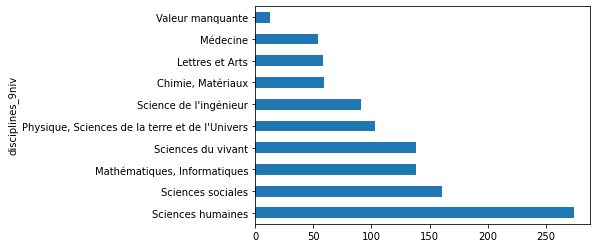

In [50]:
df["disciplines_9niv"].value_counts().plot(kind="barh")

Recoder une variable

In [51]:
df["disciplines_9niv"].unique()

array(['Sciences humaines', 'Médecine', 'Mathématiques, Informatiques',
       'Sciences du vivant', 'Sciences sociales', 'Lettres et Arts',
       'Chimie, Matériaux', "Science de l'ingénieur",
       "Physique, Sciences de la terre et de l'Univers",
       'Valeur manquante'], dtype=object)

In [55]:
dic_reco = {"Sciences humaines":"SHS","Sciences sociales":"SHS"}
df["disciplines_reco"] = df["disciplines_9niv"].replace(dic_reco)

<AxesSubplot:ylabel='count'>

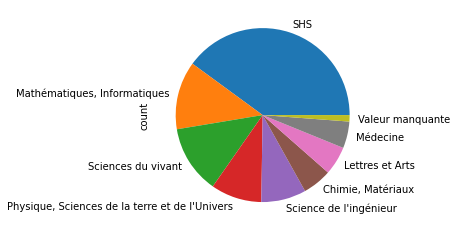

In [56]:
df["disciplines_reco"].value_counts().plot(kind="pie")

Autre méthode

In [57]:
def reco(cellule):
    if ("sociale" in cellule) | ("humaine" in cellule):
        return "SHS"
    return cellule


In [62]:
df["disciplines_reco"] = df["disciplines_9niv"].apply(reco)

In [65]:
df["annee_premiere_publi_reco"] = pd.cut(df["annee_premiere_publi"],
                                         [1900,2000,2010,2030],
                                         labels=["<2000","2000-2010",">2010"])

<AxesSubplot:xlabel='annee_premiere_publi_reco'>

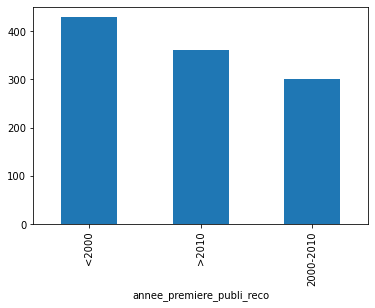

In [68]:
df["annee_premiere_publi_reco"].value_counts().plot(kind="bar")

Pandas permet aussi la manipulation de tableau

In [77]:
df2 = df[df["annee_premiere_publi"]>2010][["sexe","disciplines_reco"]]

In [80]:
df2["disciplines_reco"].value_counts(normalize=True)

disciplines_reco
SHS                                               0.502778
Mathématiques, Informatiques                      0.111111
Sciences du vivant                                0.091667
Science de l'ingénieur                            0.091667
Médecine                                          0.061111
Chimie, Matériaux                                 0.050000
Lettres et Arts                                   0.047222
Physique, Sciences de la terre et de l'Univers    0.038889
Valeur manquante                                  0.005556
Name: proportion, dtype: float64

Tableau croisé

<AxesSubplot:ylabel='disciplines_reco'>

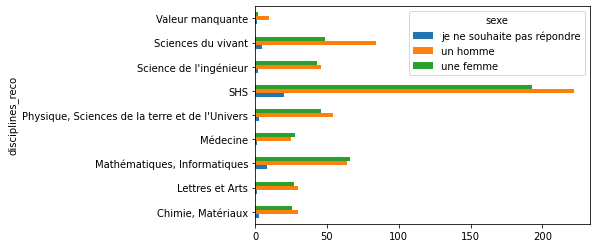

In [85]:
pd.crosstab(df["sexe"],df["disciplines_reco"]).T.plot(kind="barh")